In [1]:
import andes
from andes.interop.pandapower import to_pandapower

from math import pi, sin, cos

import matplotlib.pyplot as plt
import numpy as np

In [2]:
ss = andes.load(andes.get_case('ieee14/ieee14_ac8b.xlsx'),
                setup=False)


Generating code for 1 models on 8 processes.


In [3]:
ss.add("Toggler", dict(model='SynGen', dev="GENROU_2", t=1.0))

'Toggler_3'

In [4]:
ss.setup()


True

In [5]:
ss.PFlow.run()


True

In [6]:
ss.TDS.init()
a0 = ss.Bus.a.v

/Users/jinningwang/.andes/pycode/AC8B.py:121: RuntimeWarning: invalid value encountered in sqrt
  return array([[FEX_y*INT_y - vf0], [-FEX_y + select([less_equal(IN, 0),less_equal(IN, 0.433),less_equal(IN, 0.75),less_equal(IN, 1),greater(IN, 1),__trues], [__ones,1 - 0.577*IN,sqrt(0.75 - IN**2),1.732 - 1.732*IN,__zeros,__zeros], default=nan)], [-IN*INT_y + KC*XadIfd]])
/Users/jinningwang/.andes/pycode/AC8B.py:125: RuntimeWarning: invalid value encountered in sqrt
  return array([[FEX_y, INT_y, 0], [0, -1, select([less_equal(IN, 0),less_equal(IN, 0.433),less_equal(IN, 0.75),less_equal(IN, 1),__trues], [__zeros,-0.577*__ones,-IN/sqrt(0.75 - IN**2),-1.732*__ones,__zeros], default=nan)], [-IN, 0, -INT_y]])


In [7]:
ss.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler Toggler_1>: Line.Line_1 status changed to 0 at t=1.0 sec.
<Toggler Toggler_3>: SynGen.GENROU_2 status changed to 0 at t=1.0 sec.
<Toggler Toggler_2>: Line.Line_1 status changed to 1 at t=1.1 sec.


True

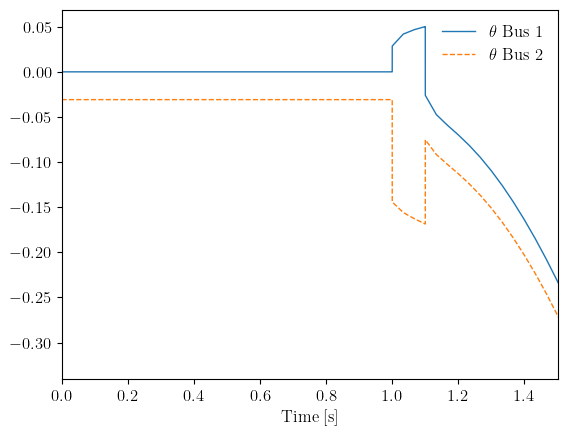

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [8]:
ss.TDS.plt.plot(ss.Bus.a, a=(0, 1), right=1.5)

In [35]:
da = ss.Bus.a.v - a0
# wt = 2 * pi * ss.config.freq * ss.dae.ts.t
wt = 2 * pi * ss.config.freq * ss.dae.t
a_bus = da[0] + wt